In [144]:
#import dependencies
import statsmodels.api as sm
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

In [145]:
#weekly gas prices in San Francisco Area
#read csv 
weekly_gas_prices = pd.read_csv("Resources/weekly_gas_prices_ca_2.csv")

#rename column 
#weekly_gas_prices = weekly_gas_prices.rename(columns={'Weekly San Francisco All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)':'Price'})

#preview data
weekly_gas_prices.head()

weekly_gas_prices = weekly_gas_prices.set_index("Date")
weekly_gas_prices = weekly_gas_prices.dropna()
weekly_gas_prices_1718 = weekly_gas_prices.loc["2017-09-06":"2018-09-08",:]
weekly_gas_prices_1718.count()

Price    52
dtype: int64

In [146]:
weekly_gas_prices.head()

,Price
Date,
2013-09-16,4.096
2013-09-23,4.052
2013-09-30,3.980
2013-10-07,3.898
2013-10-14,3.840


In [147]:
#save the gas price values into a list
gas_array = weekly_gas_prices_1718["Price"].values
gas_list = np.ndarray.tolist(gas_array)
len(gas_list)

52

In [148]:
#connect to Google
pytrends = TrendReq(hl='en-US', tz=360)

In [149]:
#set search parameter to 'Tesla'
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-15 2018-09-10', geo='US-CA',gprop='')

In [150]:
#import tesla google searches over time
tesla_searches = pytrends.interest_over_time()
tesla_searches_1718 = tesla_searches.iloc[0:52,:]
tesla_searches_1718.head()

,Tesla,isPartial
date,,
2017-09-17,45,False
2017-09-24,44,False
2017-10-01,46,False
2017-10-08,47,False
2017-10-15,46,False


In [151]:
#append Tesla google search popularity to a list
tesla_array = tesla_searches_1314["Tesla"].values
tesla_list = np.ndarray.tolist(tesla_array)
len(tesla_list)

52

In [152]:
#set parameter to 'Electric car'
kw_list = ['Electric car']
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-15 2018-09-10', geo='US-CA',gprop='')

In [153]:
#import Electric car Google searches over time
ecar_searches = pytrends.interest_over_time()
ecar_searches_1718 = ecar_searches.iloc[0:52,:]
ecar_searches_1718.head()

,Electric car,isPartial
date,,
2017-09-17,73,False
2017-09-24,70,False
2017-10-01,61,False
2017-10-08,61,False
2017-10-15,66,False


In [154]:
#append Electric car google search popularity to a list
ecar_array = ecar_searches_1718["Electric car"].values
ecar_list = np.ndarray.tolist(ecar_array)
len(ecar_list)

52

In [155]:
#set parameter to 'Prius'
kw_list = ['Prius']
pytrends.build_payload(kw_list, cat=0, timeframe='2017-09-15 2018-09-10', geo='US-CA',gprop='')

In [156]:
#import Prius Google searches over time
prius_searches = pytrends.interest_over_time()
prius_searches_1718 = prius_searches.iloc[0:52,:]
prius_searches_1718.head()

,Prius,isPartial
date,,
2017-09-17,80,False
2017-09-24,79,False
2017-10-01,79,False
2017-10-08,74,False
2017-10-15,77,False


In [157]:
#append Prius Google search popularity to a list
prius_array = prius_searches_1718["Prius"].values
prius_list = np.ndarray.tolist(prius_array)
len(prius_list)

52

In [158]:
comparison_df = weekly_gas_prices_1718.assign(Tesla = tesla_list, Electric_Cars = ecar_list, Prius = prius_list)

comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2017-09-11,3.242,45,73,80
2017-09-18,3.219,44,70,79
2017-09-25,3.199,46,61,79
2017-10-02,3.166,47,61,74
2017-10-09,3.139,46,66,77


In [159]:
comparison_df['Price'] = comparison_df['Price']*10

comparison_df.head()


,Price,Tesla,Electric_Cars,Prius
Date,,,,
2017-09-11,32.42,45,73,80
2017-09-18,32.19,44,70,79
2017-09-25,31.99,46,61,79
2017-10-02,31.66,47,61,74
2017-10-09,31.39,46,66,77


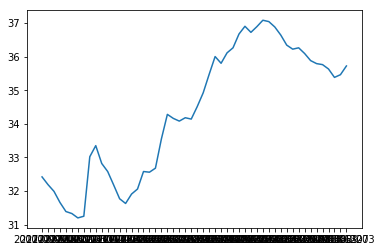

In [160]:
Price_df = comparison_df["Price"]

plt.plot(Price_df)

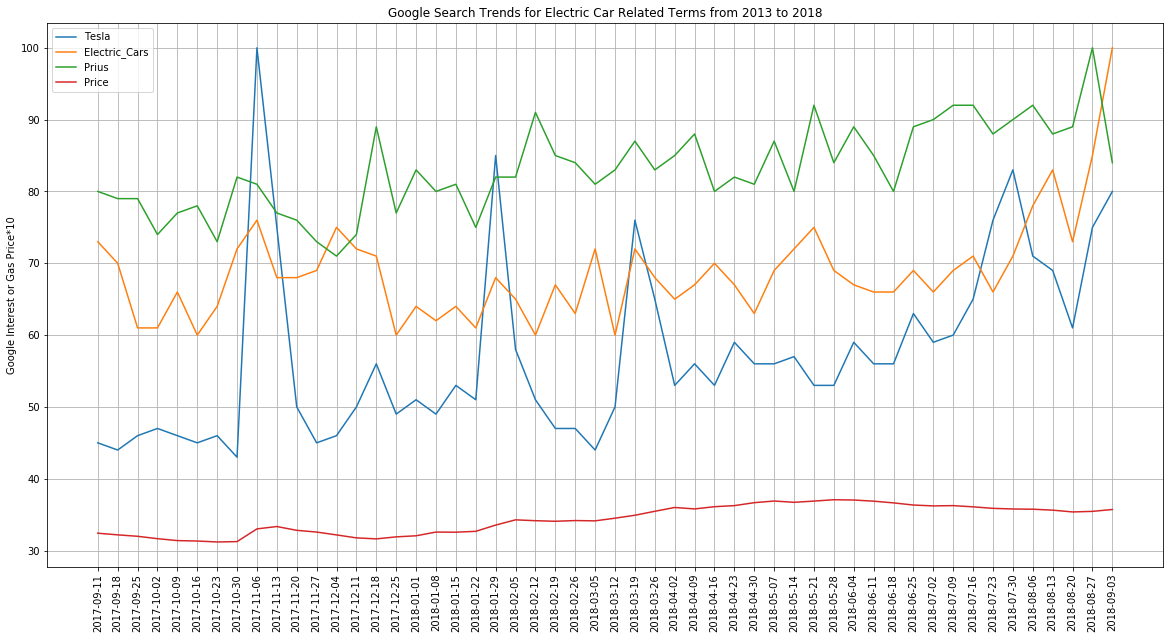

In [161]:
plt.figure(figsize=(20,10))
plt.plot(comparison_df["Tesla"])
plt.plot(comparison_df["Electric_Cars"])
plt.plot(comparison_df["Prius"])
plt.plot(comparison_df["Price"])
plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.ylabel("Google Interest or Gas Price*10")
plt.xticks(rotation=90)
plt.legend()
#plt.savefig("Images/1314/trends_gasprice_comparison.png")
plt.grid()
plt.show()

In [162]:
#do a rolling average over the 5-year trends data to normalize the spikes for a better visual

from numpy import convolve
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

rolling_prius = movingaverage(prius_list,10)

rolling_ecar = movingaverage(ecar_list,10)

rolling_tesla = movingaverage(tesla_list, 10)

In [163]:
#remove first value from gas_list so there are the same amt of values

weekly_gas_prices_rolled = weekly_gas_prices_1718.iloc[9:]
weekly_gas_prices_rolled.head()

,Price
Date,
2017-11-13,3.335
2017-11-20,3.282
2017-11-27,3.258
2017-12-04,3.218
2017-12-11,3.177


In [164]:
#save the gas price values into a list
rolled_gas_array = weekly_gas_prices_rolled["Price"].values
rolled_gas_list = np.ndarray.tolist(rolled_gas_array)
len(rolled_gas_list)

43

In [165]:
rolling_comparison_df = weekly_gas_prices_rolled.assign(Tesla = rolling_tesla, Electric_Cars = rolling_ecar, Prius = rolling_prius)

rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2017-11-13,3.335,53.7,67.1,78.0
2017-11-20,3.282,54.2,66.6,77.6
2017-11-27,3.258,54.3,66.5,77.0
2017-12-04,3.218,54.3,67.9,76.2
2017-12-11,3.177,54.6,69.0,76.2


In [166]:
rolling_comparison_df['Price'] = rolling_comparison_df['Price']*10
rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2017-11-13,33.35,53.7,67.1,78.0
2017-11-20,32.82,54.2,66.6,77.6
2017-11-27,32.58,54.3,66.5,77.0
2017-12-04,32.18,54.3,67.9,76.2
2017-12-11,31.77,54.6,69.0,76.2


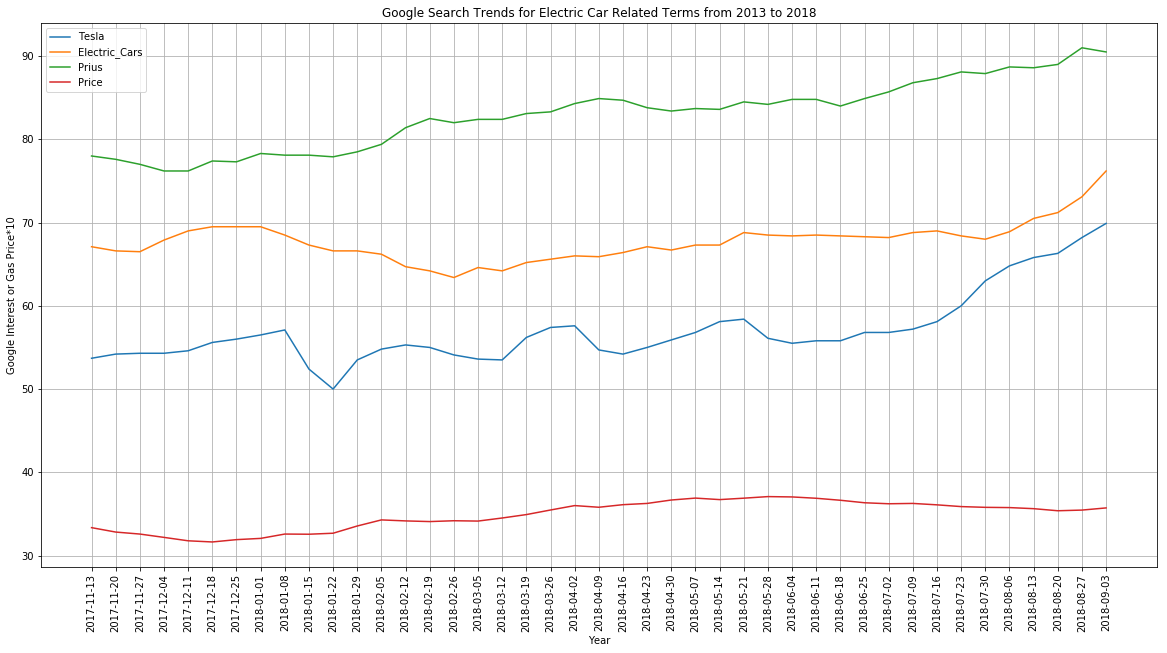

In [167]:
plt.figure(figsize=(20,10))
plt.plot(rolling_comparison_df["Tesla"])
plt.plot(rolling_comparison_df["Electric_Cars"])
plt.plot(rolling_comparison_df["Prius"])
plt.plot(rolling_comparison_df["Price"])

plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.xlabel("Year")
plt.ylabel("Google Interest or Gas Price*10")
plt.legend()
plt.xticks(rotation=90)
#plt.savefig("Images/1314/trends_gasprice_rollingcomparison.png")
plt.grid()
plt.show()

In [168]:
#STATISTICAL ANALYSIS

#compare gas price line (independant variable) with each google search result (dependent variables)

#OPTION 1: Create scatter plot for x=gas price y=trend
#          Calculate line of best fit
#          Try it with Prius first

In [169]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_prius)


In [170]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= 19.158602369585115 * x + 16.152549186413438
   
r-squared: 0.6417979236833252
r-value: 0.8011229142168668
p-value: 1.104978972928487e-10
standard error: 2.2353050079077885


Text(0,0.5,'Google Searches')

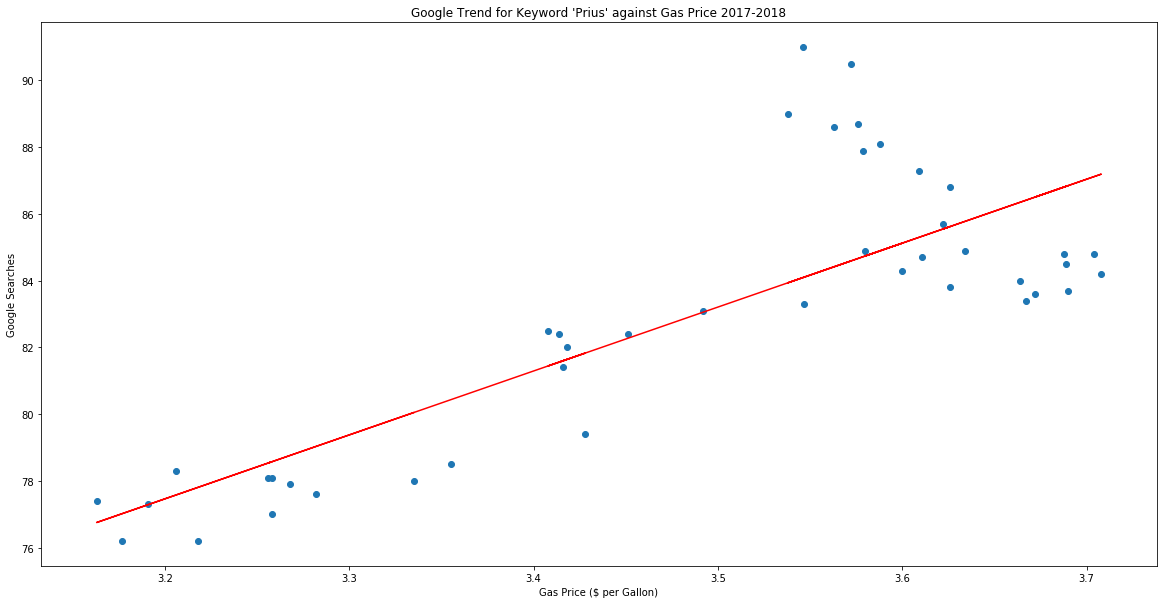

In [171]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_prius, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Prius' against Gas Price 2017-2018")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingprius_scatter.png")

In [172]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_ecar)

In [173]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= 1.5187554436120592 * x + 62.440678843968776
   
r-squared: 0.012426613839989956
r-value: 0.11147472287469458
p-value: 0.4766683070511406
standard error: 2.1144830430725117


Text(0,0.5,'Google Searches')

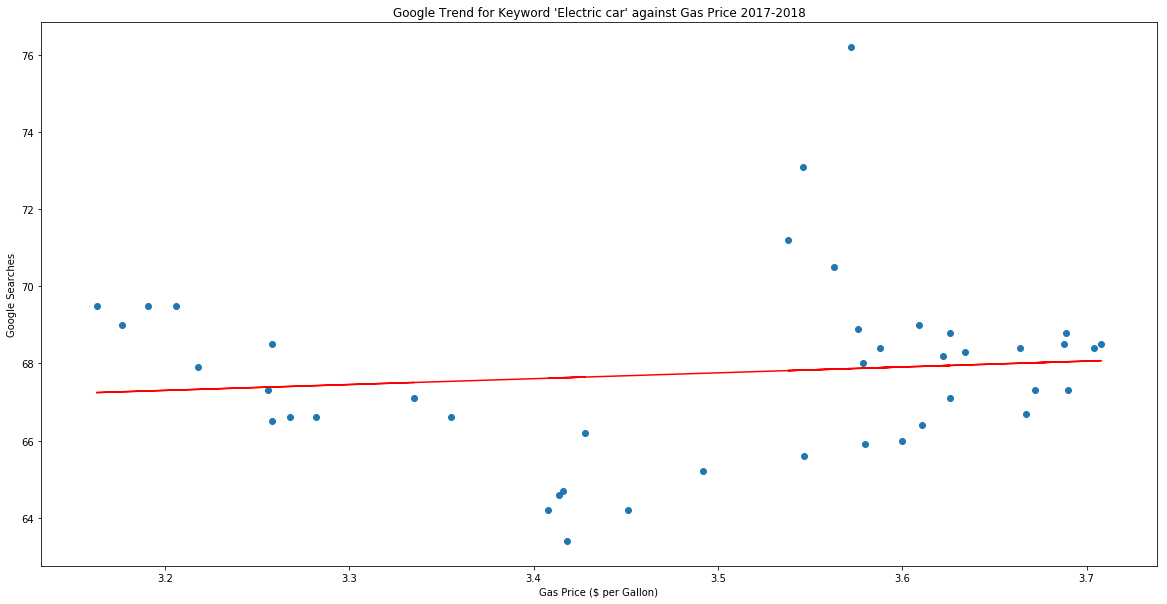

In [174]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_ecar, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Electric car' against Gas Price 2017-2018")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingprius_scatter.png")

In [175]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_tesla)

In [176]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= 8.913649636287975 * x + 25.97223988529969
   
r-squared: 0.13071498831243863
r-value: 0.3615452783711034
p-value: 0.017211668344367746
standard error: 3.5898973685388467


Text(0,0.5,'Google Searches')

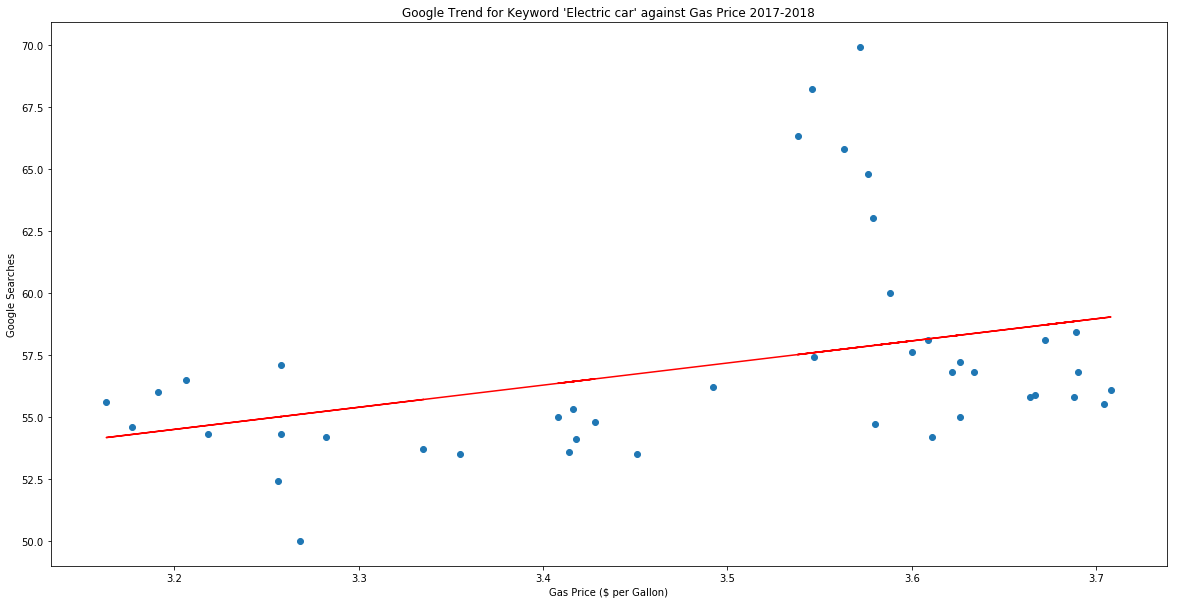

In [177]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_tesla, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Electric car' against Gas Price 2017-2018")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingprius_scatter.png")